# Analýza sentimentu - zadanie č. 2

### Autori
Marián Hriň, Jakub Pivovar, Filip Šajna

## Popis problému
V tomto zadaní sa zameriavame na analýzu sentimentu tweetov. Cieľom je klasifikovať tweety do štyroch kategórií: pozitívne, neutrálne, negatívne a irelevantné. Na dosiahnutie tohto cieľa použijeme rôzne techniky predspracovania textu a algoritmy strojového učenia.
## Popis existujúcich metód
Existujúce prístupy k analýze sentimentu možno rozdeliť do troch hlavných kategórií:

1. **Techniky založené na znalostiach** - tieto prístupy klasifikujú text podľa emocionálnych kategórií na základe prítomnosti jednoznačných emocionálnych slov, ako sú šťastný, smutný, vystrašený a znudený. Niektoré databázy vedomostí uvádzajú emocionálne slová a priraďujú im pravdepodobnú „affinitu“ (príbuznosť) k emóciám.

2. **Štatistické metódy** - tieto metódy využívajú strojové učenie, ako sú latentná sémantická analýza, stroje podporných vektorov, model "bag of words", PMI, modely sémantického priestoru a slovného vkladania, a hlboké učenie. Pokročilé metódy sa snažia identifikovať držiteľa (osobu, ktorá udržiava daný emocionálny stav)sentimentu a cieľ(subjekt, o ktorom je pocit vyjadrený), pričom využívajú gramatické vzťahy slov získané hlbokým spracovaním textu.

3. **Hybridné prístupy** - tieto prístupy kombinujú strojové učenie a prvky z reprezentácie vedomostí, ako sú ontológie a sémantické siete, na detekciu sémantiky, ktorá je vyjadrená jemnejším spôsobom. To môže zahŕňať analýzu konceptov, ktoré výslovne nevyjadrujú relevantné informácie, ale sú implicitne spojené s inými konceptmi, ktoré ich vyjadrujú.

- Otvorené aj komerčné nástroje na analýzu sentimentu používajú strojové učenie, štatistiku a spracovanie prirodzeného jazyka na analýzu veľkých zbierok textov, ako sú webové stránky, správy a sociálne médiá. Systémy založené na znalostiach využívajú verejné zdroje na extrakciu sémantických a emocionálnych informácií.

- Existujú aj prístupy k analýze sentimentu vizuálneho obsahu, ako sú obrázky a videá (multimodálna analýza). Väčšina prístupov stále využíva model "bag-of-words", ktorý ignoruje kontext a gramatiku, ale prístupy, ktoré analyzujú dlhšie frázy, dosahujú lepšie výsledky, hoci s vyššími nákladmi na anotáciu.

- Analýza sentimentu si vyžaduje aj ľudské hodnotenie, pretože automatizované systémy nie vždy správne klasifikujú sentiment. Automatizácia správne klasifikuje asi 23% komentárov, no medziľudská zhoda určuje hornú hranicu pre automatizované systémy.

## Návrh metódy a výber testovacích dát
1. **Načítanie a predspracovanie dát** - načítame 2 dátové súbory (pre trénovanie a testovanie) obsahujúce tweety a vykonáme predspracovanie textu, ktoré zahŕňa odstránenie špeciálnych znakov, tokenizáciu, lematizáciu a odstránenie stop slov.
2. **Vektorová reprezentácia textu** - použijeme TF-IDF na transformáciu textových dát do numerickej formy, ktorú môžu spracovať algoritmy strojového učenia.
3. **Tréning a vyhodnotenie modelov** - natrénujeme niekoľko modelov strojového učenia vrátane logistickej regresie, Naive Bayes, SVM, Random Forest, Decision Tree, KNN a XGBoost. Tieto modely vyhodnotíme pomocou validačných a testovacích dát. Keďže dataset už bol rozdelený na trénovaciu a testovaciu množinu výber testovacích dát nie je potrebný.
4. **Optimalizácia hyperparametrov** - použijeme GridSearchCV na nájdenie najlepších hyperparametrov pre vybrané modely.
5. **Vyhodnotenie najlepších modelov** - vytvoríme klasifikačné správy a matice zámeny pre najlepšie modely, aby sme lepšie pochopili ich výkonnosť.
6. **Interaktívne testovanie** - implementujeme jednoduchý interaktívny test, ktorý umožní používateľom zadať vetu a získať predpoveď sentimentu.

### Použité knižnice
- **Pandas** - načítanie a manipulácia s dátami.
- **Matplotlib a Seaborn** - vizualizácia dát a výsledkov modelov.
- **NLTK** - predspracovanie textu vrátane tokenizácie a lematizácie.
- **Scikit-learn**: Na vektorovú reprezentáciu textu, tréning a použitie modelov a optimalizáciu hyperparametrov.
- **XGBoost**: Na použitie modelu XGBoost.

### Očakávané výsledky
- **Presnosť modelov** - očakávame, že niektoré modely budú mať vyššiu presnosť, ako iné. Na základe validačných a testovacích dát identifikujeme najlepšie modely.
- **Klasifikačné správy a matice zámeny** - tieto vizualizácie nám pomôžu lepšie pochopiť, ako dobre modely klasifikujú jednotlivé kategórie sentimentu.
- **Interaktívne testovanie** - používatelia budú môcť zadať vetu a získať predpoveď sentimentu, čo demonštruje praktické využitie modelov.

## Načítanie knižníc

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import re

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from xgboost import XGBClassifier
from sklearn.svm import SVC
from nltk import pos_tag

## Načítanie dát

In [2]:
df_train = pd.read_csv('data/Twitter/twitter_training.csv')
df_test = pd.read_csv('data/Twitter/twitter_validation.csv')

df_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


## Predspracovanie dáta

#### Označenie stĺpcov

In [3]:
df_train.columns=['id','topic','target','tweet']
df_test.columns=['id','topic','target','tweet']

In [4]:
df_test.head()

,id,topic,target,tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...



#### Odstránenie irelevantných stĺpcov

In [5]:
df_train.drop(['id','topic'], axis=1, inplace=True)
df_test.drop(['id','topic'], axis=1, inplace=True)

#### Odstránenie chýbajúcich hodnôt

In [6]:
df_train.isna().sum()
df_train.dropna(inplace=True)

#### Odstránenie duplikátov

In [7]:
print(df_train.duplicated().sum())

4227


In [8]:
df_train.drop_duplicates(inplace=True)

#### Odstránenie špeciálnych znakov, prevedenie na malé písmo a odstránenie stop slov

In [ ]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    text = text.split()
    text = [word for word in text if word not in stop_words]
    text = " ".join(text)
    return text

df_train["cleaned_tweet"] = df_train["tweet"].apply(clean_text)
df_test["cleaned_tweet"] = df_test["tweet"].apply(clean_text)

#### Tokenizácia
Tokenizácia je proces rozdelenia textu na menšie časti, nazývané tokeny. Tokeny môžu byť slová, frázy alebo celé vety.

In [ ]:
nltk.download("punkt_tab")

def tokenize_text(text):
    return word_tokenize(text)

df_train["tokenized_tweet"] = df_train["cleaned_tweet"].apply(tokenize_text)
df_test["tokenized_tweet"] = df_test["cleaned_tweet"].apply(tokenize_text)

#### Lematizácia
Lematizácia je proces znižovania slov na ich základnú alebo koreňovú formu.
##### Penn Treebank POS (Part-Of-Speech) schéma značkovania, kde:
 - 'J' znamená prídavné mená [**adjectives**] (napr. 'JJ' pre prídavné meno, ako "beautiful").
 - 'V' znamená slovesá [**verbs**] (napr. 'VB' pre sloveso, ako "run")
 - 'N' znamená podstatné mená [**nouns**] (napr. 'NN' pre podstatné meno, ako "dog").
 - 'R' znamená príslovky [**adverbs**] (napr. 'RB' pre príslovku, ako "quickly").

In [ ]:
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger_eng")

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_text(tokens):
    lemmatized_tokens = []
    lemmatizer = WordNetLemmatizer()
    pos_tags = pos_tag(tokens)

    for token, tag in pos_tags:
        lemmatized_token = lemmatizer.lemmatize(token, get_wordnet_pos(tag))
        lemmatized_tokens.append(lemmatized_token)
    return lemmatized_tokens

df_train["lemmatized_tweet"] = df_train["tokenized_tweet"].apply(lemmatize_text)
df_test["lemmatized_tweet"] = df_test["tokenized_tweet"].apply(lemmatize_text)

#### Enkódovanie cieľovej premennej

In [12]:
df_train["target"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [13]:
df_train["target"] = df_train["target"].map({"Positive": 0, "Neutral": 1,"Negative": 2, "Irrelevant": 3})
df_test["target"] = df_test["target"].map({"Positive": 0, "Neutral": 1,"Negative": 2, "Irrelevant": 3})

## Extrakcia príznakov


#### Vektorová reprezentácia pomocou TF-IDF
Vektorová reprezentácia pomocou TF-IDF (Term Frequency-Inverse Document Frequency) je technika na prevod textových dát do numerickej formy, s ktorými môžu ďalej pracovať algoritmy strojového učenia.

In [14]:
df_train["tf-idf_apply"] = df_train["lemmatized_tweet"].apply(lambda tokens: " ".join(tokens))
df_test["tf-idf_apply"] = df_test["lemmatized_tweet"].apply(lambda tokens: " ".join(tokens))

vectorizer = TfidfVectorizer(max_features=7500)
X_train = vectorizer.fit_transform(df_train["tf-idf_apply"])
X_test = vectorizer.transform(df_test["tf-idf_apply"])

y_train = df_train["target"]
y_test = df_test["target"]

In [15]:
df_train.head(10)

,target,tweet,cleaned_tweet,tokenized_tweet,lemmatized_tweet,tf-idf_apply
0,0,I am coming to the borders and I will kill you...,coming borders kill,"[coming, borders, kill]","[come, border, kill]",come border kill
1,0,im getting on borderlands and i will kill you ...,im getting borderlands kill,"[im, getting, borderlands, kill]","[im, get, borderland, kill]",im get borderland kill
2,0,im coming on borderlands and i will murder you...,im coming borderlands murder,"[im, coming, borderlands, murder]","[im, come, borderland, murder]",im come borderland murder
3,0,im getting on borderlands 2 and i will murder ...,im getting borderlands murder,"[im, getting, borderlands, murder]","[im, get, borderland, murder]",im get borderland murder
4,0,im getting into borderlands and i can murder y...,im getting borderlands murder,"[im, getting, borderlands, murder]","[im, get, borderland, murder]",im get borderland murder
5,0,So I spent a few hours making something for fu...,spent hours making something fun dont know hug...,"[spent, hours, making, something, fun, dont, k...","[spent, hour, make, something, fun, dont, know...",spent hour make something fun dont know huge b...
6,0,So I spent a couple of hours doing something f...,spent couple hours something fun dont know im ...,"[spent, couple, hours, something, fun, dont, k...","[spent, couple, hour, something, fun, dont, kn...",spent couple hour something fun dont know im h...
7,0,So I spent a few hours doing something for fun...,spent hours something fun dont know im huge bo...,"[spent, hours, something, fun, dont, know, im,...","[spent, hour, something, fun, dont, know, im, ...",spent hour something fun dont know im huge bor...
8,0,So I spent a few hours making something for fu...,spent hours making something fun dont know hug...,"[spent, hours, making, something, fun, dont, k...","[spent, hour, make, something, fun, dont, know...",spent hour make something fun dont know huge r...
9,0,2010 So I spent a few hours making something f...,spent hours making something fun dont know hug...,"[spent, hours, making, something, fun, dont, k...","[spent, hour, make, something, fun, dont, know...",spent hour make something fun dont know huge r...


## Rozdelenie trénovacej sady na trénovaciu a validačnú

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## Modelovanie

In [17]:
logistic_regression = LogisticRegression(max_iter=2000)
naive_bayes = MultinomialNB()
svm = SVC()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
xgboost_model = XGBClassifier()
decision_tree = DecisionTreeClassifier()

logistic_regression.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
svm.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

models = (
    ("Logistic Regression", logistic_regression),
    ("Naive Bayes", naive_bayes),
    ("SVM", svm),
    ("Random Forest", random_forest),
    ("Decision Tree", decision_tree),
    ("KNN", knn),
    ("XGBoost", xgboost_model)
)

for name, model in models:
    y_val_pred = model.predict(X_val)
    print(f"{name} Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

Logistic Regression Validation Accuracy: 0.7060
Naive Bayes Validation Accuracy: 0.6632
SVM Validation Accuracy: 0.8940
Random Forest Validation Accuracy: 0.8915
Decision Tree Validation Accuracy: 0.7719
KNN Validation Accuracy: 0.8586
XGBoost Validation Accuracy: 0.6327


## Optimalizácia hyperparametrov pomocou GridSearchCV

In [18]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None] + list(range(3, 15, 2)),
    'min_samples_split': [2, 5, 10]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

param_grid_dt = {
    'max_depth': [None] + list(range(3, 9, 2)),
    'min_samples_split': list(range(2, 9, 3)),
    'min_samples_leaf': list(range(1, 12, 3)),
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, verbose=1)
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, verbose=1)
grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=param_grid_dt, cv=5, verbose=1)

grid_search_rf.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)

print("Best parameters - Random Forest:", grid_search_rf.best_params_)
print("Best score - Random Forest:", grid_search_rf.best_score_)

print("Best parameters - KNN:", grid_search_knn.best_params_)
print("Best score - KNN:", grid_search_knn.best_score_)

print("Best parameters - Decision Tree:", grid_search_dt.best_params_)
print("Best score - Decision Tree:", grid_search_dt.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters - Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score - Random Forest: 0.8715169279743595
Best parameters - KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best score - KNN: 0.9048082818900124
Best parameters - Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score - Decision Tree: 0.7510033362644302


## Vyhodnotenie modelov s optimalizovanými hyperparametrami

In [24]:
random_forest = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=300)
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2)

random_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

models = (
    ("Random Forest", random_forest),
    ("KNN", knn),
    ("Decision Tree", decision_tree)
)
for name, model in models:
    y_pred = model.predict(X_val)
    print(f"{name} Validation Accuracy: {accuracy_score(y_val, y_pred):.4f}")

Random Forest Validation Accuracy: 0.8941
KNN Validation Accuracy: 0.9226
Decision Tree Validation Accuracy: 0.7731


**Kedže SVM je výpočtovo náročný algoritmus nezaradili sme ho medzi modely, ktoré sme optimalizovali.**

Po optimalizácií hyperparametrov presnosť modelu Random Forest stúpla minimálne, takisto ako Decision Tree. Na druhú stranu model KNN sa zlepšil o 6,4 %.

## Vyhodnotenie pomocou matice zámen a klasifikačných správ

In [20]:
best_models = (
    ("SVM",svm),
    ("Random Forest", random_forest),
    ("KNN", knn),
    ("Decision Tree", decision_tree)
)

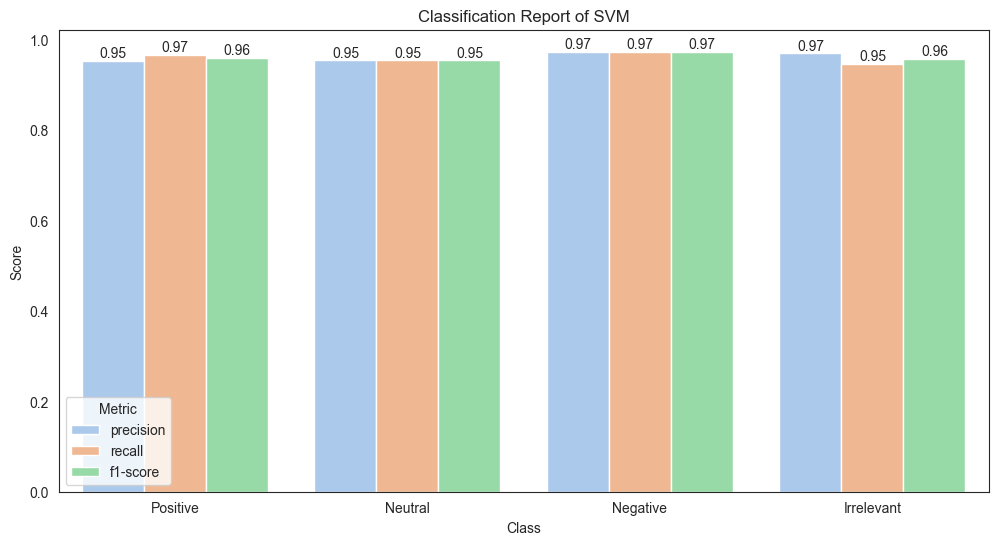

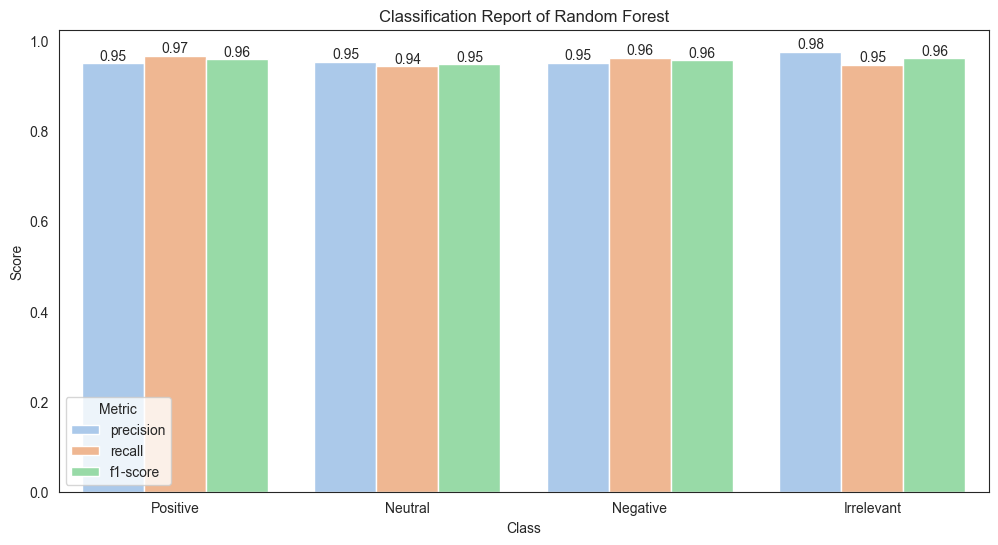

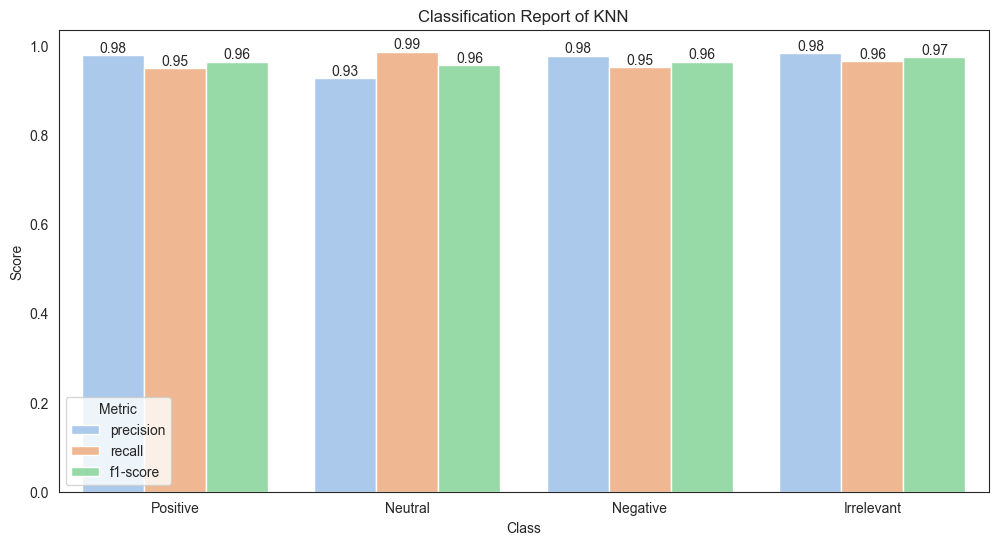

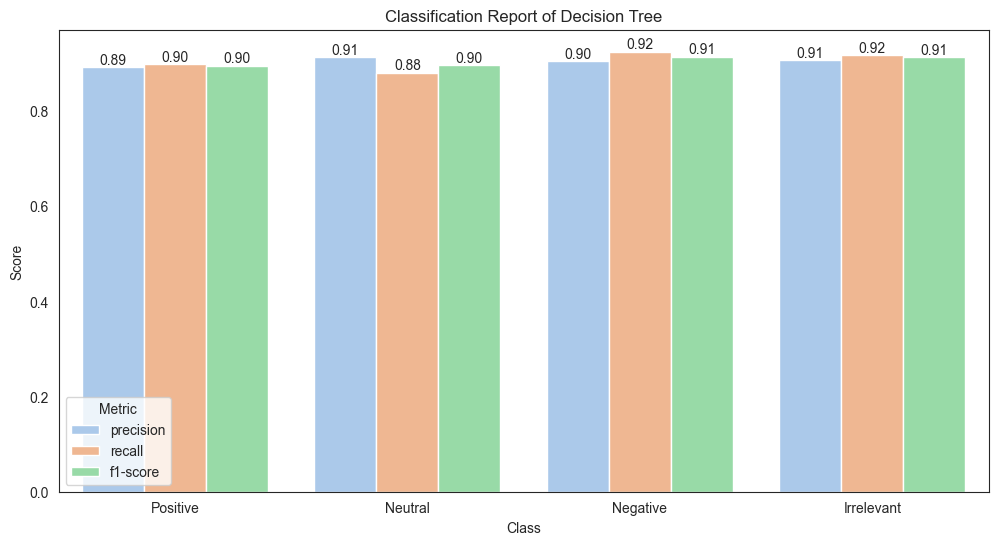

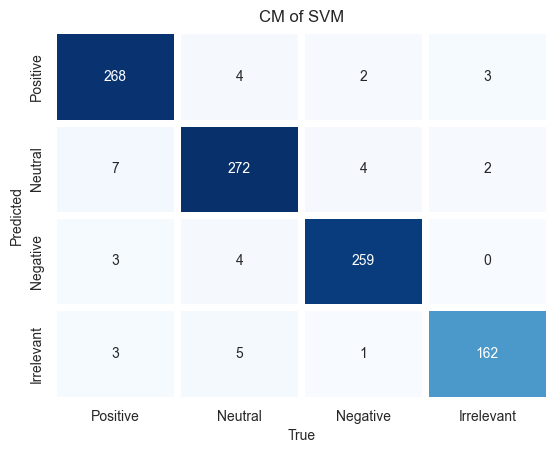

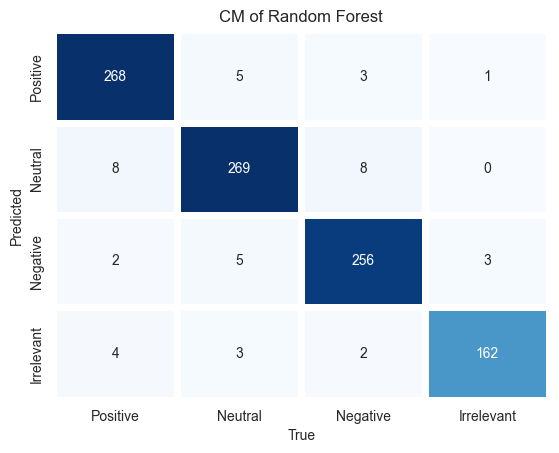

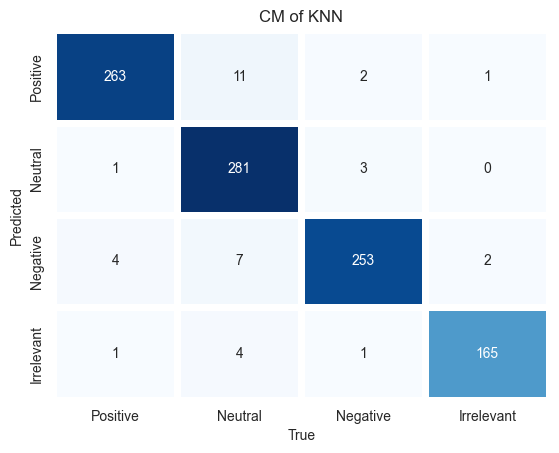

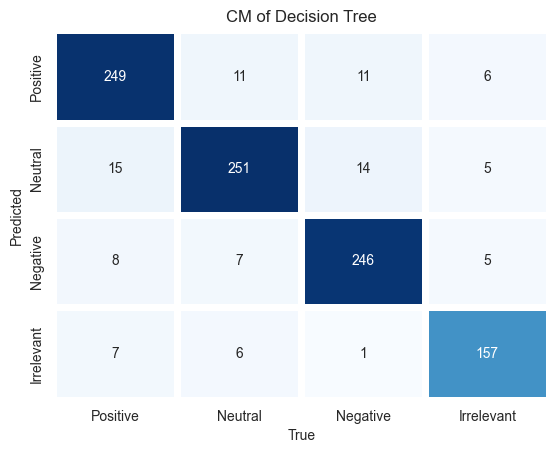

In [21]:
sns.set_style("white")

target_names = ["Positive", "Neutral", "Negative", "Irrelevant"]

for name, model in best_models:
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    report_df = pd.DataFrame(report).transpose().reset_index()

    report_melted = report_df.melt(id_vars='index', value_vars=['precision', 'recall', 'f1-score'], var_name='metric', value_name='score')
    report_melted = report_melted[~report_melted['index'].isin(['macro avg', 'weighted avg', 'accuracy'])]

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='index', y='score', hue='metric', data=report_melted, palette='pastel')
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')

    plt.title(f'Classification Report of {name}')
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.legend(title='Metric')
    plt.show()

for name, model in best_models:
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, cmap='Blues', linewidths=5, fmt='d', xticklabels=target_names, yticklabels=target_names, cbar=False)
    plt.title(f'CM of {name}')
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.show()

## Interaktívne testovanie

In [23]:
while True:
    sentence = input("Enter a text: ")
    if sentence.lower() == 'exit':
        break

    preprocessed_sentence = " ".join(lemmatize_text(tokenize_text(clean_text(sentence))))
    transformed_sentence = vectorizer.transform([preprocessed_sentence])

    prediction = svm.predict(transformed_sentence)

    label_map = {0: "Positive", 1: "Neutral", 2: "Negative", 3: "Irrelevant"}
    predicted_label = label_map[prediction[0]]

    print("Your sentence:", sentence)
    print("Predicted label:", predicted_label)

Your sentence: I love TUKE KKUI
Predicted label: Positive
Your sentence: I hate SmerSD
Predicted label: Negative
Your sentence: Hello
Predicted label: Neutral
Your sentence: irrelevant irrelevant irrelevant message
Predicted label: Irrelevant


## Záver
V tomto zadaní sme vykonali analýzu sentimentu na súbore údajov Twitteru. Začali sme načítaním a predbežným spracovaním údajov, ktoré zahŕňalo čistenie textu, tokenizáciu a lematizáciu. Potom sme zakódovali cieľovú premennú a transformovali textové údaje na vektory TF-IDF.

Natrénovali sme niekoľko modelov strojového učenia vrátane logistickej regresie, Naive Bayes, SVM, Random Forest, Decision Tree, KNN a XGBoost. Tieto modely sme vyhodnotili pomocou testovacej množiny a na základe ich presnosti sme identifikovali najvýkonnejšie modely.

Nakoniec sme pre najlepšie modely vytvorili klasifikačné správy a matice zámen, aby sme lepšie pochopili ich výkonnosť. Implementovali sme aj jednoduchý interaktívny test na predpovedanie sentimentu viet zadaných používateľom.
Celkovo toto zadanie preukázalo účinnosť rôznych algoritmov strojového učenia v úlohách analýzy sentimentu a poskytlo prehľad o silných a slabých stránkach jednotlivých modelov.